In [1]:
import pandas as pd

df = pd.read_csv("housing.csv")
print(df.head())

  0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0   0.02731   0.00   7.070  0  0.4690  6.4210  78...                                             
1   0.02729   0.00   7.070  0  0.4690  7.1850  61...                                             
2   0.03237   0.00   2.180  0  0.4580  6.9980  45...                                             
3   0.06905   0.00   2.180  0  0.4580  7.1470  54...                                             
4   0.02985   0.00   2.180  0  0.4580  6.4300  58...                                             


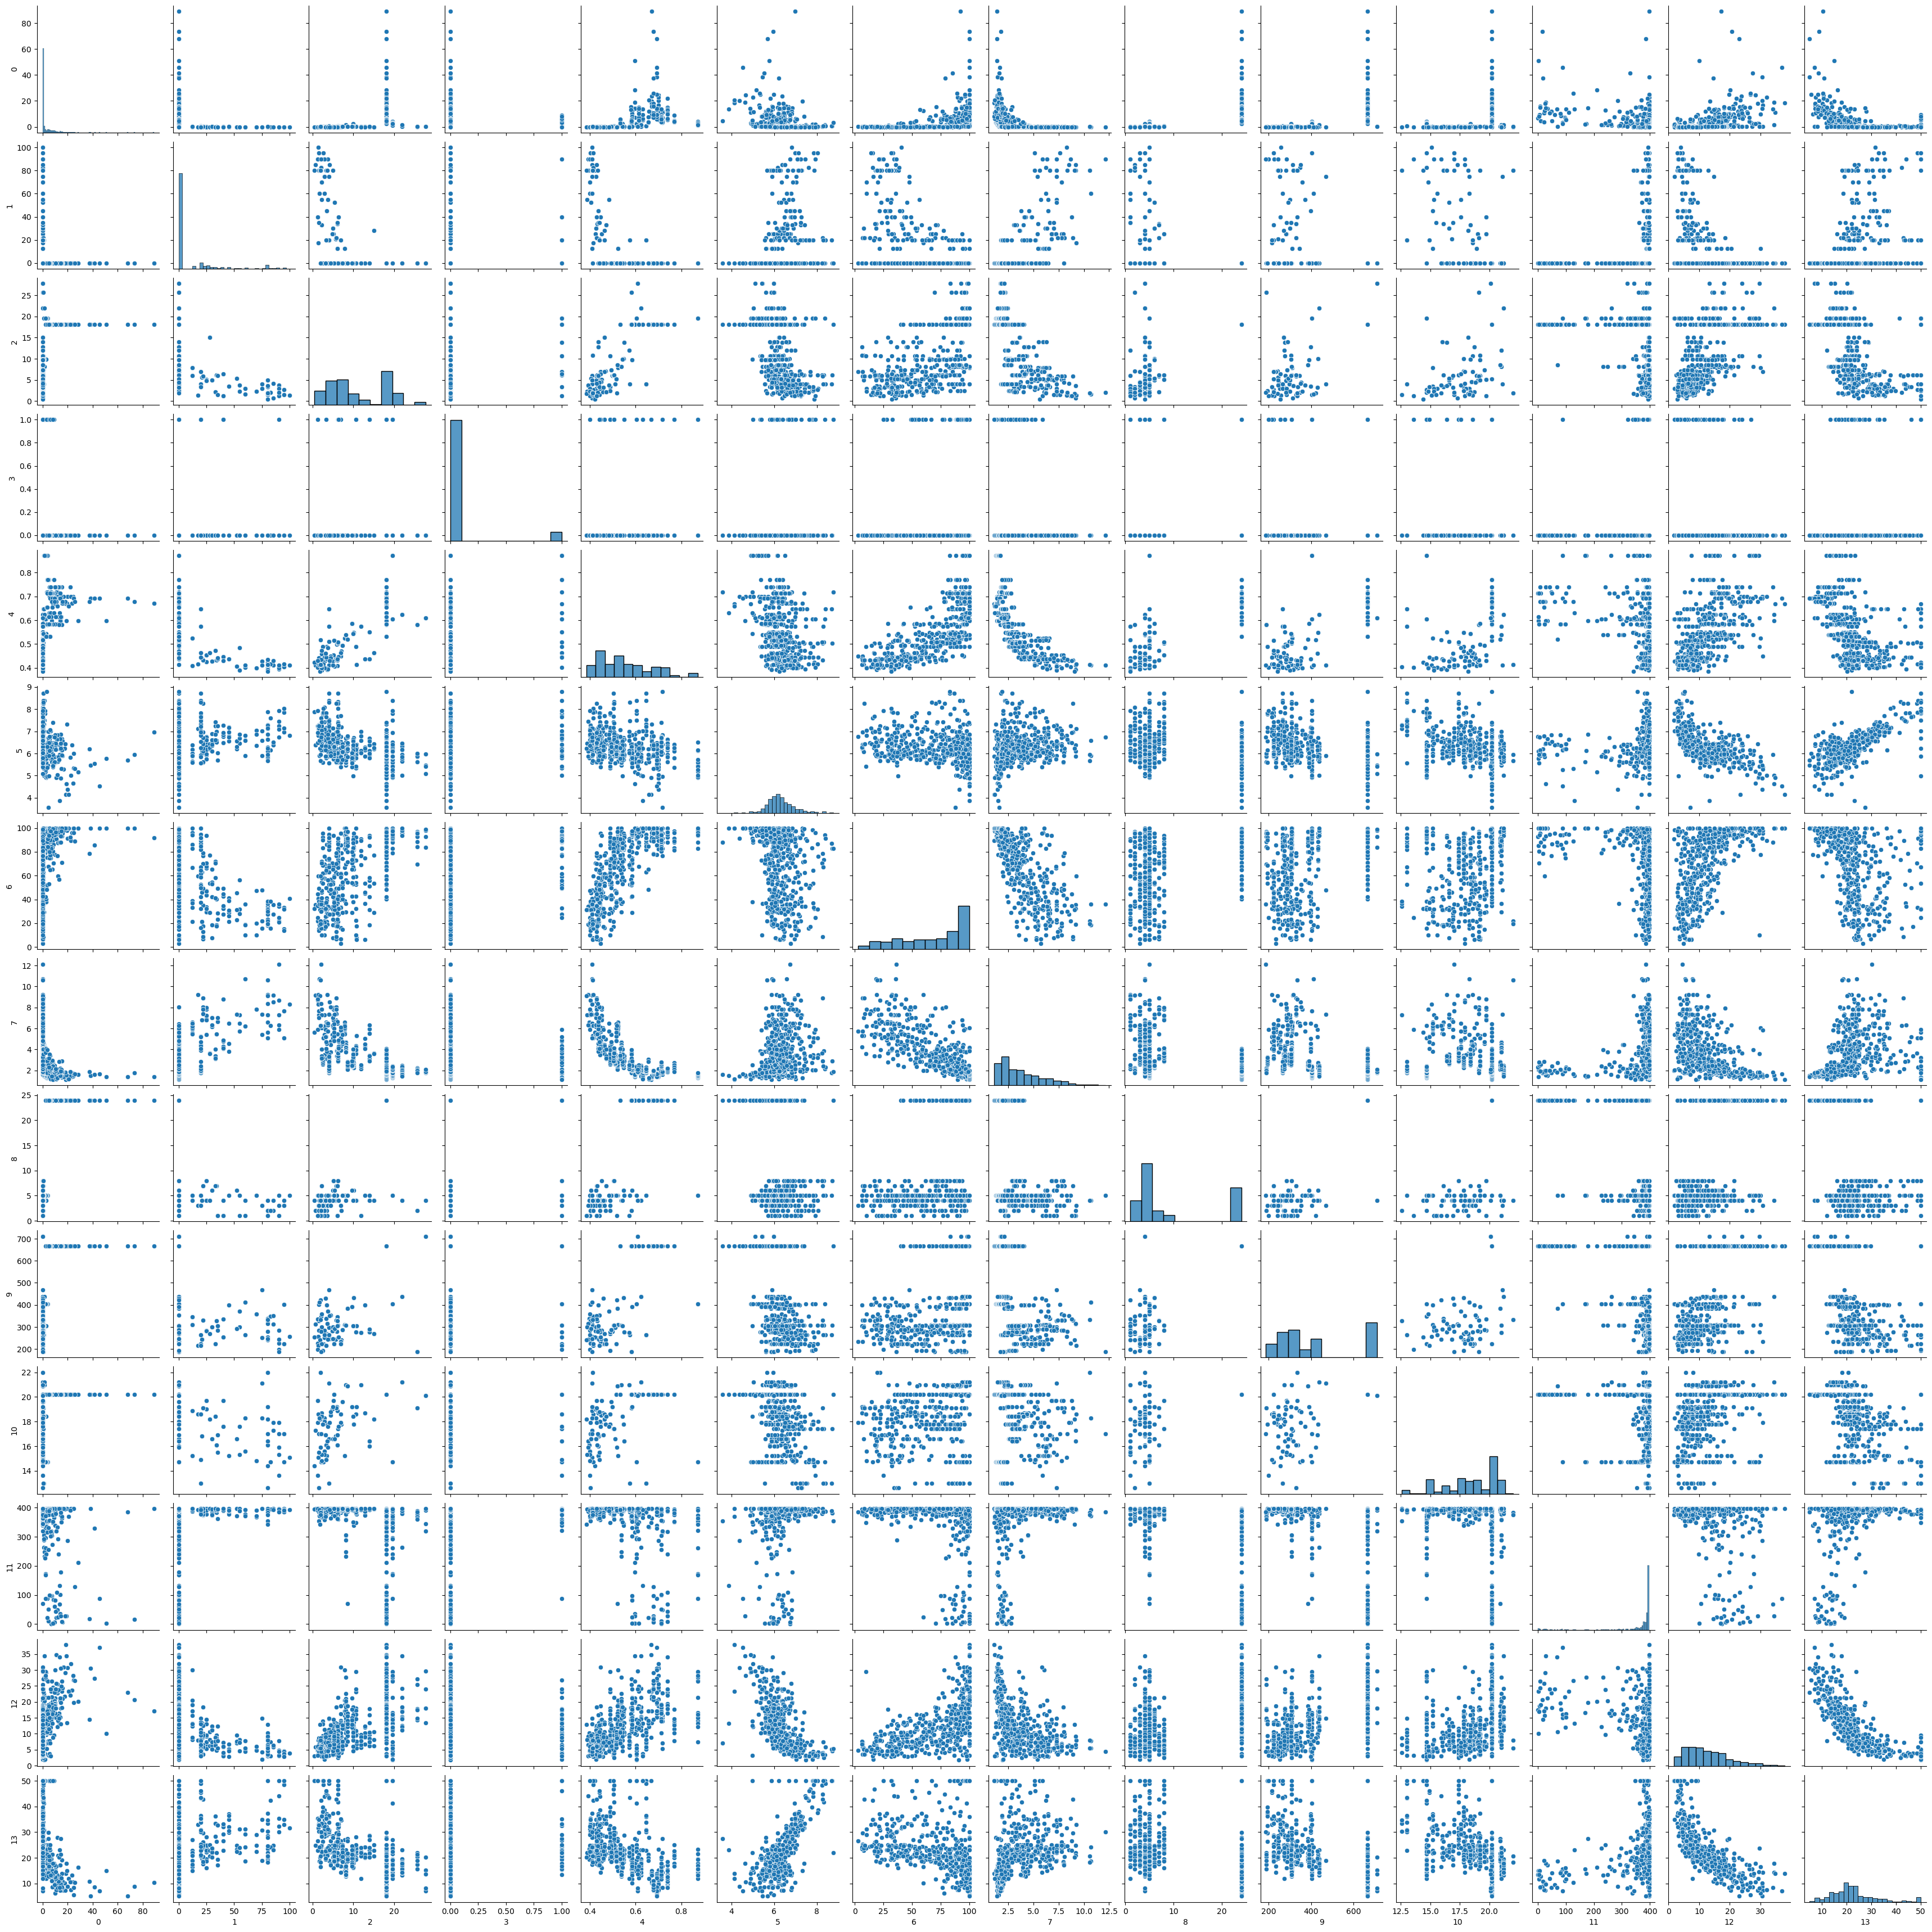

               0           1           2           3           4           5   \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728    6.284059   
std      8.608572   23.343704    6.855868    0.254227    0.115990    0.703195   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082210    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.678220   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean    68.581584    3.794459    9.566337  408.459406   18.461782  356.594376   
std     28.176371    2.1077

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split the single column into multiple columns (assuming space-separated values)
df_fixed = df[df.columns[0]].str.split(expand=True)
df_fixed = df_fixed.apply(pd.to_numeric, errors='coerce')

sns.pairplot(df_fixed)
plt.show()

print(df_fixed.describe())

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_fixed.iloc[:, :-1]
y = df_fixed.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 19.379041116136783
R² Score: 0.6522201888666195


In [7]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
print("R² Score:", rf_model.score(X_test, y_test))

R² Score: 0.8651092971724408


In [8]:
import joblib
joblib.dump(rf_model, "house_price_model.pkl")

model = joblib.load("house_price_model.pkl")